In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## PART-1 DATA CLEANING

In [2]:
# Data Import and Inspection

In [3]:
df = pd.read_csv("C:\\Users\\Hassam\\Desktop\\ML papers\\data\\t20i_Matches_Data.csv")

In [4]:
#Inspecting data structure of all columns and checking of Dataframe Shape

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   T20I Match No          2592 non-null   int64  
 1   Match ID               2592 non-null   int64  
 2   Match Name             2592 non-null   object 
 3   Series ID              2592 non-null   int64  
 4   Series Name            2592 non-null   object 
 5   Match Date             2581 non-null   object 
 6   Match Format           2592 non-null   object 
 7   Team1 ID               2592 non-null   int64  
 8   Team1 Name             2592 non-null   object 
 9   Team1 Captain          2592 non-null   int64  
 10  Team1 Runs Scored      2579 non-null   float64
 11  Team1 Wickets Fell     2579 non-null   float64
 12  Team1 Extras Rec       2579 non-null   float64
 13  Team2 ID               2592 non-null   int64  
 14  Team2 Name             2592 non-null   object 
 15  Team

In [6]:
## There are 33 columns in the data, let's inspect the columns and DataFrame.

In [7]:
pd.set_option('display.max_columns', 33)
pd.set_option('display.max_colwidth', 70)

In [8]:
df.sample(5)

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 ID,Team2 Name,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Umpire 1,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
1378,1374,1273733,Australia Vs Sri Lanka 22Nd Match Group 1,1267897,ICC Men's T20 World Cup in Oman/United Arab Emirates - 2021 (2021/22),2021-10-28,T20,8,Sri Lanka,61690,154.0,6.0,15.0,2,Australia,35812,155.0,3.0,4.0,Dubai International Cricket Stadium,Dubai,United Arab Emirates,Aleem Dar,RK Illingworth,JJ Crowe,Australia,bowl,Australia,Australia won by 7 wickets (with 18 balls remaining),58435.0,"['93033', '52373', '78229', '78231', '56511', '78239', '61690', '7...","['48739', '35812', '54222', '50281', '54212', '50771', '49024', '6...",[]
2576,2576,1426475,Nepal Vs United Arab Emirates 1St Semi Final,1426424,ACC Men's Premier Cup in Oman - 2024 (2024),2024-04-19,T20,32,Nepal,95873,119.0,9.0,6.0,27,U.A.E.,108314,123.0,4.0,2.0,Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1),Al Amarat,Oman,Morshed Ali Khan,Rahul Asher,Selim Shahid,U.A.E.,bowl,U.A.E.,U.A.E. won by 6 wickets (with 16 balls remaining),103780.0,"['79287', '94925', '95873', '103764', '102117', '79281', '108705',...","['103780', '108314', '109160', '53424', '101446', '108302', '10696...",[]
536,533,951325,Ireland Vs Netherlands 11Th Match First Round Group A,901359,World T20 in India - 2016 (2015/16),2016-03-13,T20,15,Netherlands,45001,59.0,5.0,8.0,29,Ireland,47403,47.0,7.0,9.0,Himachal Pradesh Cricket Association Stadium,Dharamsala,India,NJ Llong,S Ravi,AJ Pycroft,Ireland,bowl,Netherlands,Netherlands won by 12 runs,56854.0,"['49218', '48736', '47391', '48111', '45001', '49443', '63105', '4...","['47403', '52631', '47397', '47401', '10351', '48527', '66284', '5...",[]
394,392,682949,Bangladesh Vs Pakistan 27Th Match Group 2,628368,World T20 in Bangladesh - 2014 (2013/14),2014-03-30,T20,7,Pakistan,19647,190.0,5.0,13.0,25,Bangladesh,47986,140.0,7.0,5.0,Shere Bangla National Stadium,Dhaka,Bangladesh,IJ Gould,RA Kettleborough,RS Madugalle,Pakistan,bat,Pakistan,Pakistan won by 50 runs,49899.0,"['49899', '9257', '19647', '53546', '8270', '4169', '47686', '4812...","['48391', '58536', '48277', '47984', '47986', '52363', '47352', '4...",[]
2160,2159,1383076,Denmark Vs Germany 9Th Match,1383037,ICC Men's T20 World Cup Europe Region Qualifier in Scotland - 2023...,2023-07-23,T20,13,Denmark,95153,124.0,9.0,7.0,35,Germany,97542,126.0,4.0,2.0,Grange Cricket Club Ground,Edinburgh,Scotland,DH McLean,R Black,P Whitticase,Germany,bowl,Germany,Germany won by 6 wickets (with 19 balls remaining),74473.0,"['102185', '95153', '95154', '71955', '93387', '93395', '112012', ...","['97542', '74473', '57153', '66720', '105325', '69919', '105323', ...",[]


In [9]:
df.columns

Index(['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name',
       'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain',
       'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec',
       'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored',
       'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)',
       'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2',
       'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner',
       'Match Result Text', 'MOM Player', 'Team1 Playing 11',
       'Team2 Playing 11', 'Debut Players'],
      dtype='object')

In [10]:
##Removing un-necessary columns and saving relevant columns

In [11]:
df = df[['T20I Match No', 'Match Name', 'Match Date', 'Team1 Name', 'Team1 Runs Scored', 'Team1 Wickets Fell',
    'Team2 Name','Team2 Runs Scored', 'Team2 Wickets Fell', 'Match Venue (Stadium)', 'Match Venue (City)', 
    'Match Venue (Country)', 'Toss Winner', 'Toss Winner Choice', 'Match Winner', 'Match Result Text' ]]

In [12]:
##inspection of remaining columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   T20I Match No          2592 non-null   int64  
 1   Match Name             2592 non-null   object 
 2   Match Date             2581 non-null   object 
 3   Team1 Name             2592 non-null   object 
 4   Team1 Runs Scored      2579 non-null   float64
 5   Team1 Wickets Fell     2579 non-null   float64
 6   Team2 Name             2592 non-null   object 
 7   Team2 Runs Scored      2542 non-null   float64
 8   Team2 Wickets Fell     2542 non-null   float64
 9   Match Venue (Stadium)  2592 non-null   object 
 10  Match Venue (City)     2592 non-null   object 
 11  Match Venue (Country)  2592 non-null   object 
 12  Toss Winner            2591 non-null   object 
 13  Toss Winner Choice     2582 non-null   object 
 14  Match Winner           2494 non-null   object 
 15  Matc

In [14]:
#Renaming of columns for easy calling and future analysis

In [15]:
df.columns = ['match_no', 'match_name', 'match_date', 'team1_name', 'team1_runs_scored', 'team1_wickets_fell', 
              'team2_name','team2_runs_scored', 'team2_wickets_fell', 'venue_stadium', 'venue_city', 'venue_country', 
              'toss_winner', 'toss_winner_choice', 'match_winner', 'match_result_text']

# Handling, Filling and Visulaization of Missing Vlaues

In [16]:
##checking for missing values

In [17]:
df.isnull().sum()

match_no               0
match_name             0
match_date            11
team1_name             0
team1_runs_scored     13
team1_wickets_fell    13
team2_name             0
team2_runs_scored     50
team2_wickets_fell    50
venue_stadium          0
venue_city             0
venue_country          0
toss_winner            1
toss_winner_choice    10
match_winner          98
match_result_text      0
dtype: int64

In [18]:
#Visualizing Missing Values

<AxesSubplot:>

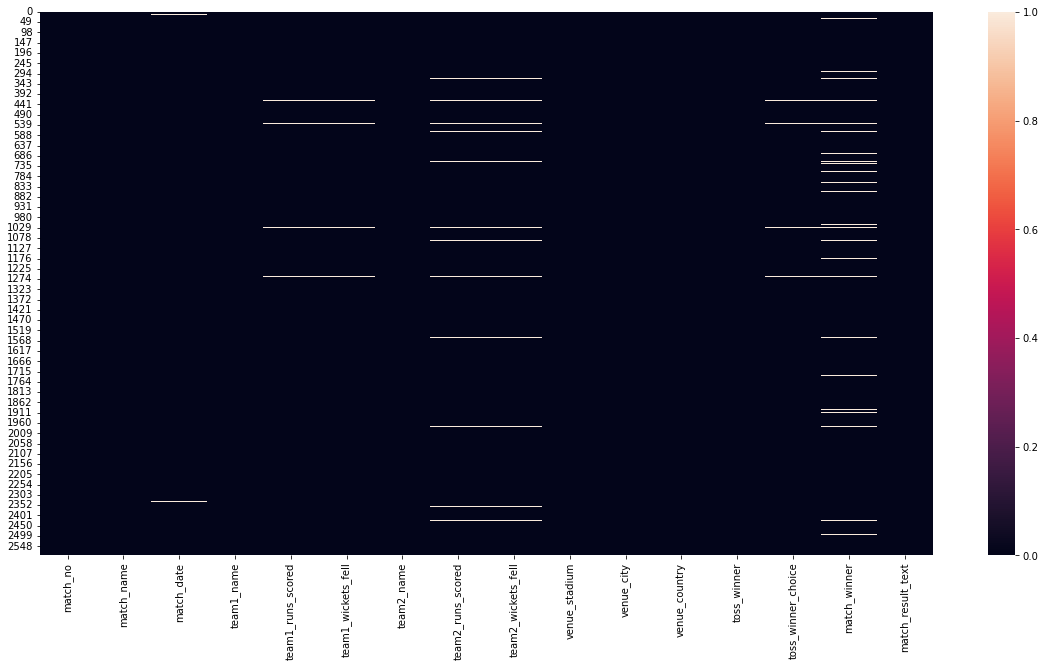

In [19]:
plt.subplots(figsize= (20,10))
sns.heatmap(df.isna(), cbar= True, color = 'blue')

In [20]:
# Investigating missing values in 'match_winner' column

# The 'match_winner' column has a significant number of missing entries. 
# It's crucial to determine if these missing values are solely due to abandoned matches.

# While 'match_result_text' might indicate 'abandonment' for some missing values, 
# it also reveals cases where the match ended in a 'Tie' (winner in superovver). 

# Dropping all missing values in 'match_winner' would eliminate valuable data 
# for tied matches. Therefore, we need to explore these missing entries 
# further to understand the underlying reasons and potentially impute them 
# with appropriate values (e.g., 'Tied' for known ties).

# Below is missing values and inspection.


In [21]:
df[df['match_winner'].isna()]

,match_no,match_name,match_date,team1_name,team1_runs_scored,team1_wickets_fell,team2_name,team2_runs_scored,team2_wickets_fell,venue_stadium,venue_city,venue_country,toss_winner,toss_winner_choice,match_winner,match_result_text
14,5,New Zealand Vs West Indies Only T20I,NaN,West Indies,126.0,7.0,New Zealand,126.0,8.0,Eden Park,Auckland,New Zealand,New Zealand,bowl,NaN,Match tied
31,149,New Zealand Vs Australia 2Nd T20I,2010-02-28,New Zealand,214.0,6.0,Australia,214.0,4.0,AMI Stadium,Christchurch,New Zealand,New Zealand,bat,NaN,Match tied (New Zealand won the one-over eliminator)
37,26,India Vs Scotland 7Th Match Group D,2007-09-13,India,NaN,NaN,Scotland,NaN,NaN,Kingsmead,Durban,South Africa,Scotland,bowl,NaN,No result (abandoned with a toss)
40,29,India Vs Pakistan 10Th Match Group D,2007-09-14,India,141.0,9.0,Pakistan,141.0,7.0,Kingsmead,Durban,South Africa,Pakistan,bowl,NaN,Match tied
76,68,Ireland Vs Netherlands Final,2008-08-05,Netherlands,NaN,NaN,Ireland,NaN,NaN,Civil Service Cricket Club,Belfast,Ireland,Ireland,bowl,NaN,No result (abandoned with a toss)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2435,India Vs Afghanistan 3Rd T20I,2024-01-17,India,212.0,4.0,Afghanistan,212.0,6.0,M Chinnaswamy Stadium,Bengaluru,India,India,bat,NaN,Match tied (India won the 2nd Super Over)
2492,2491,Qatar Vs Hong Kong 3Rd T20I,2024-03-01,Qatar,125.0,10.0,Hong Kong,125.0,8.0,West End Park International Cricket Stadium,Doha,Qatar,Hong Kong,bowl,NaN,Match tied (Hong Kong won the Super Over)
2494,2493,Namibia Vs Netherlands 6Th Match,2024-03-03,Namibia,98.0,4.0,Netherlands,NaN,NaN,Tribhuvan University International Cricket Ground,Kirtipur,Nepal,Netherlands,bowl,NaN,No result
2512,2511,Hong Kong Vs Nepal 1St Match,2024-03-10,Hong Kong,65.0,2.0,Nepal,NaN,NaN,Mission Road Ground,Mong Kok,Hong Kong,Nepal,bowl,NaN,No result


In [22]:
df.iloc[:, [0,1,2,5,-5,-4,-3]]

,match_no,match_name,match_date,team1_wickets_fell,venue_country,toss_winner,toss_winner_choice
0,52,Australia Vs India Only T20I,2008-02-01,10.0,Australia,India,bat
1,54,New Zealand Vs England 2Nd T20I,2008-02-07,8.0,New Zealand,England,bat
2,65,Netherlands Vs Scotland 2Nd Semi Final,2008-08-04,8.0,Ireland,Netherlands,bowl
3,66,Kenya Vs Scotland 3Rd Place Playoff,2008-08-04,9.0,Ireland,Kenya,bat
4,69,Sri Lanka Vs Zimbabwe 1St Match,2008-10-10,8.0,Canada,Sri Lanka,bowl
...,...,...,...,...,...,...,...
2587,2588,Indonesia Vs Thailand 4Th T20I,2024-05-05,9.0,Indonesia,Indonesia,bowl
2588,2589,Bangladesh Vs Zimbabwe 2Nd T20I,2024-05-05,7.0,Bangladesh,Bangladesh,bowl
2589,2590,Indonesia Vs Thailand 5Th T20I,2024-05-06,8.0,Indonesia,Indonesia,bat
2590,2591,Japan Vs Mongolia 1St T20I,2024-05-07,5.0,Japan,Japan,bat


In [23]:
# Identify and handle matches with no result in 'match_result_text'

# Our goal is to predict match winners. Matches without a result due to rain, abandonment, 
# or other reasons are not relevant for our analysis. We can drop these rows 
# from the DataFrame to focus on matches with a definitive outcome. 

In [24]:
df['match_result_text'].value_counts()

No result                                             52
No result (abandoned with a toss)                     12
Pakistan won by 11 runs                                5
South Africa won by 1 run                              4
Match tied                                             4
                                                      ..
Oman won by 8 wickets (with 31 balls remaining)        1
Spain won by 8 wickets (with 34 balls remaining)       1
Ireland won by 8 wickets (with 36 balls remaining)     1
P.N.G. won by 43 runs                                  1
Japan won by 166 runs                                  1
Name: match_result_text, Length: 2288, dtype: int64

In [25]:
# Remove rows with no match results

In [26]:
rm_index = df[(df['match_result_text'] == 'No result') | (df['match_result_text'] == 'No result (abandoned with a toss)')].index
df.drop(index = rm_index, inplace= True)

In [27]:
# Inspecting null values again

In [28]:
df.isna().sum()

match_no               0
match_name             0
match_date            11
team1_name             0
team1_runs_scored      1
team1_wickets_fell     1
team2_name             0
team2_runs_scored      2
team2_wickets_fell     2
venue_stadium          0
venue_city             0
venue_country          0
toss_winner            1
toss_winner_choice     0
match_winner          34
match_result_text      0
dtype: int64

In [29]:
df[(df['team1_runs_scored'].isna()) | (df['team2_runs_scored'].isna())]

,match_no,match_name,match_date,team1_name,team1_runs_scored,team1_wickets_fell,team2_name,team2_runs_scored,team2_wickets_fell,venue_stadium,venue_city,venue_country,toss_winner,toss_winner_choice,match_winner,match_result_text
2205,2204,Romania Vs Malta Qualifier,2023-08-20,Malta,NaN,NaN,Romania,NaN,NaN,Moara Vlasiei Cricket Ground,Ilfov County,Romania,Romania,bowl,Romania,Romania won by 9 wickets (with 9 balls remaining)
2358,2357,Indonesia Vs Cambodia 6Th T20I,2023-11-23,Cambodia,77.0,3.0,Indonesia,NaN,NaN,Udayana Cricket Ground,Bali,Indonesia,Indonesia,bowl,Indonesia,Indonesia awarded the match (opposition refused to play)


In [30]:
# Above inspection shows that we can remove these rows as well

In [31]:
df.drop(index = df[(df['team1_runs_scored'].isna()) | (df['team2_runs_scored'].isna())].index, inplace = True)

In [32]:
# Inspecting null values for match_winner column again.

In [33]:
df[df['match_winner'].isna()]

,match_no,match_name,match_date,team1_name,team1_runs_scored,team1_wickets_fell,team2_name,team2_runs_scored,team2_wickets_fell,venue_stadium,venue_city,venue_country,toss_winner,toss_winner_choice,match_winner,match_result_text
14,5,New Zealand Vs West Indies Only T20I,NaN,West Indies,126.0,7.0,New Zealand,126.0,8.0,Eden Park,Auckland,New Zealand,New Zealand,bowl,NaN,Match tied
31,149,New Zealand Vs Australia 2Nd T20I,2010-02-28,New Zealand,214.0,6.0,Australia,214.0,4.0,AMI Stadium,Christchurch,New Zealand,New Zealand,bat,NaN,Match tied (New Zealand won the one-over eliminator)
40,29,India Vs Pakistan 10Th Match Group D,2007-09-14,India,141.0,9.0,Pakistan,141.0,7.0,Kingsmead,Durban,South Africa,Pakistan,bowl,NaN,Match tied
77,71,Canada Vs Zimbabwe 3Rd Match,2008-10-11,Canada,135.0,7.0,Zimbabwe,135.0,9.0,Maple Leaf North-West Ground,King City,Canada,Zimbabwe,bowl,NaN,Match tied
80,78,New Zealand Vs West Indies 1St T20I,2008-12-26,New Zealand,155.0,7.0,West Indies,155.0,8.0,Eden Park,Auckland,New Zealand,New Zealand,bat,NaN,Match tied (West Indies won the one-over eliminator)
258,257,Australia Vs Pakistan 2Nd T20I,2012-09-07,Pakistan,151.0,4.0,Australia,151.0,8.0,Dubai International Cricket Stadium,Dubai,United Arab Emirates,Pakistan,bat,NaN,Match tied (Pakistan won the one-over eliminator)
276,275,Sri Lanka Vs New Zealand 13Th Match Group 1,2012-09-27,New Zealand,174.0,7.0,Sri Lanka,174.0,6.0,Pallekele International Cricket Stadium,Kandy,Sri Lanka,New Zealand,bat,NaN,Match tied (Sri Lanka won the one-over eliminator)
284,283,New Zealand Vs West Indies 21St Match Group 1,2012-10-01,West Indies,139.0,10.0,New Zealand,139.0,7.0,Pallekele International Cricket Stadium,Kandy,Sri Lanka,New Zealand,bowl,NaN,Match tied (West Indies won the one-over eliminator)
476,473,England Vs Pakistan 3Rd T20I,2015-11-30,England,154.0,8.0,Pakistan,154.0,7.0,Sharjah Cricket Stadium,Sharjah,United Arab Emirates,England,bat,NaN,Match tied (England won the one-over eliminator)
675,675,Ireland Vs Scotland 4Th Match,2018-06-17,Scotland,185.0,4.0,Ireland,185.0,6.0,Sportpark Het Schootsveld,Deventer,Netherlands,Scotland,bat,NaN,Match tied


In [34]:
# Imputing missing values in 'match_winner' using 'match_result_text'
# Using Regular Expression to extract winner from 'macth_winner_text' column and then filling misssing value 
# of match_winner with this extratced value.

In [35]:
df['match_winner'].value_counts()

India           140
Pakistan        138
New Zealand     109
Australia       100
South Africa     96
               ... 
Turkey            1
Estonia           1
Cameroon          1
Myanmar           1
Israel            1
Name: match_winner, Length: 99, dtype: int64

In [36]:
#fucntion to fill the missing values for match_winner column.

def fill_miss_winner(row):
    text = row['match_result_text'].lower()
    pattern = r'(?<=tied\b\s).*won'
    if re.search(pattern, text):
        return re.search(r'(?<=tied\b\s).*won', text).group(0)
    elif re.search(r'match\s+tied', text):
        return 'match tied'
    else:
        return row['match_winner'].lower()

In [37]:
df['match_winner']= df.apply(fill_miss_winner, axis =1)

In [38]:
df['match_winner'] = df['match_winner'].str.replace(r'\(', '', regex= True)
df['match_winner'] = df['match_winner'].str.replace('won', '', regex= False)
df['match_winner'] = df['match_winner'].str.strip()

In [39]:
# value counts for match_winner now should increase.

In [40]:
df['match_winner'].value_counts()

india           143
pakistan        139
new zealand     110
australia       101
south africa     97
               ... 
gambia            1
brazil            1
israel            1
chile             1
swaziland         1
Name: match_winner, Length: 100, dtype: int64

In [41]:
# Inspecting and filling missing values in match_date column

In [42]:
df[df.match_date.isna()]

,match_no,match_name,match_date,team1_name,team1_runs_scored,team1_wickets_fell,team2_name,team2_runs_scored,team2_wickets_fell,venue_stadium,venue_city,venue_country,toss_winner,toss_winner_choice,match_winner,match_result_text
10,1,New Zealand Vs Australia Only T20I,NaN,Australia,214.0,5.0,New Zealand,170.0,10.0,Eden Park,Auckland,New Zealand,Australia,bat,australia,Australia won by 44 runs
11,2,England Vs Australia Only T20I,NaN,England,179.0,8.0,Australia,79.0,10.0,The Rose Bowl,Southampton,England,England,bat,england,England won by 100 runs
12,3,South Africa Vs New Zealand Only T20I,NaN,South Africa,133.0,10.0,New Zealand,134.0,5.0,New Wanderers Stadium,Johannesburg,South Africa,New Zealand,bowl,new zealand,New Zealand won by 5 wickets (with 12 balls remaining)
13,4,Australia Vs South Africa Only T20I,NaN,Australia,209.0,3.0,South Africa,114.0,10.0,Brisbane Cricket Ground,Brisbane,Australia,Australia,bat,australia,Australia won by 95 runs
14,5,New Zealand Vs West Indies Only T20I,NaN,West Indies,126.0,7.0,New Zealand,126.0,8.0,Eden Park,Auckland,New Zealand,New Zealand,bowl,match tied,Match tied
15,6,South Africa Vs Australia Only T20I,NaN,South Africa,201.0,4.0,Australia,199.0,7.0,New Wanderers Stadium,Johannesburg,South Africa,South Africa,bat,south africa,South Africa won by 2 runs
517,514,Pakistan Vs United Arab Emirates 6Th Match,NaN,U.A.E.,129.0,6.0,Pakistan,131.0,3.0,Shere Bangla National Stadium,Dhaka,Bangladesh,U.A.E.,bat,pakistan,Pakistan won by 7 wickets (with 8 balls remaining)
901,898,Malaysia Vs Vanuatu 2Nd T20I,NaN,Vanuatu,188.0,6.0,Malaysia,137.0,7.0,Kinrara Academy Oval,Kuala Lumpur,Malaysia,Vanuatu,bat,vanuatu,Vanuatu won by 51 runs
1332,1329,Rwanda Vs Lesotho 16Th Match Group A,NaN,Rwanda,102.0,8.0,Lesotho,80.0,7.0,Integrated Polytechnic Regional Centre,Kigali City,Rwanda,Rwanda,bat,rwanda,Rwanda won by 22 runs
2333,2330,Nepal Vs United Arab Emirates Final,NaN,Nepal,162.0,8.0,U.A.E.,167.0,6.0,Tribhuvan University International Cricket Ground,Kirtipur,Nepal,U.A.E.,bowl,u.a.e.,U.A.E. won by 4 wickets (with 1 ball remaining)


In [43]:
# Above inspection suggests that 'match_no' has a chronological order, likely 
# increasing with year and time. This makes it a suitable column for sorting the DataFrame.

# By sorting the DataFrame by 'match_no', we will arrange the matches 
# in their chronological order. This is particularly beneficial as we want to analyze 
# the data over time later on.

# Once the DataFrame is sorted, we will impute missing dates in the 'match_date' column 
# using the 'bfill' (backward fill) method. This method will replace missing dates with the 
# date from the next row.

In [44]:
df.sort_values(by = 'match_no', inplace = True)
df['match_date'].fillna(method = 'bfill', inplace=True)
df.reset_index(drop = True, inplace = True)

In [45]:
# Successfully handled and filled all missing values.
# Inpsecting data again

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_no            2526 non-null   int64  
 1   match_name          2526 non-null   object 
 2   match_date          2526 non-null   object 
 3   team1_name          2526 non-null   object 
 4   team1_runs_scored   2526 non-null   float64
 5   team1_wickets_fell  2526 non-null   float64
 6   team2_name          2526 non-null   object 
 7   team2_runs_scored   2526 non-null   float64
 8   team2_wickets_fell  2526 non-null   float64
 9   venue_stadium       2526 non-null   object 
 10  venue_city          2526 non-null   object 
 11  venue_country       2526 non-null   object 
 12  toss_winner         2525 non-null   object 
 13  toss_winner_choice  2526 non-null   object 
 14  match_winner        2526 non-null   object 
 15  match_result_text   2526 non-null   object 
dtypes: flo

In [47]:
# Converting below columns to integer data type from float.
# This conversion assumes scores and wickets are always whole numbers (e.g., no fractio 

In [48]:
df['team1_runs_scored'] = df['team1_runs_scored'].astype(int)
df['team1_wickets_fell'] = df['team1_wickets_fell'].astype(int)
df['team2_runs_scored'] = df['team2_runs_scored'].astype(int)
df['team2_wickets_fell'] = df['team2_wickets_fell'].astype(int)

In [49]:
# Converting Date to datetime data type for better data analysis

In [50]:
df['match_date'] = pd.to_datetime(df['match_date'], format = '%Y-%m-%d')

In [51]:
object_cols = df.dtypes[df.dtypes == 'object'].index.to_list()

In [52]:
# Converting texts to lower_case to reduce redundancy.

In [53]:
for col in object_cols:
    df[col] = df[col].str.lower()

# PART-2 DATA ANALYSIS AND FURTHER CLEAN-UP IF REQUIRED

In [54]:
total_matches_played = df['team1_name'].value_counts().add(df['team2_name'].value_counts(), 
                        fill_value =0).sort_values(
    ascending= False).astype(int).to_frame().reset_index().rename(columns = {'index' : 'country', 0 : 'no_of_matches'})

In [55]:
total_no_wins = df.groupby('match_winner')['match_no'].count().sort_values(
    ascending = False).reset_index().rename(columns = {'match_winner' : 'country', 'match_no' : 'no_of_wins'})

In [56]:
total_no_wins.drop(index = total_no_wins[total_no_wins['country'] == 'match tied'].index, inplace = True)

In [57]:
team_stats = total_matches_played.merge(total_no_wins, on = 'country', how = 'outer').fillna(0)
team_stats['no_of_matches'] = team_stats['no_of_matches'].astype(int)
team_stats['no_of_wins'] = team_stats['no_of_wins'].astype(int)

In [58]:
team_stats

,country,no_of_matches,no_of_wins
0,pakistan,229,139
1,india,213,143
2,new zealand,209,110
3,sri lanka,187,87
4,australia,184,101
...,...,...,...
100,brazil,4,1
101,iran,3,0
102,mongolia,3,0
103,world-xi,3,1


In [59]:
team_stats_pivot = pd.melt(team_stats.nlargest(14, 'no_of_wins'), 
        id_vars = 'country', value_vars = ['no_of_matches', 'no_of_wins'],var_name = 'type')

In [60]:
custom_order = team_stats.nlargest(14, 'no_of_wins')['country'].to_list()

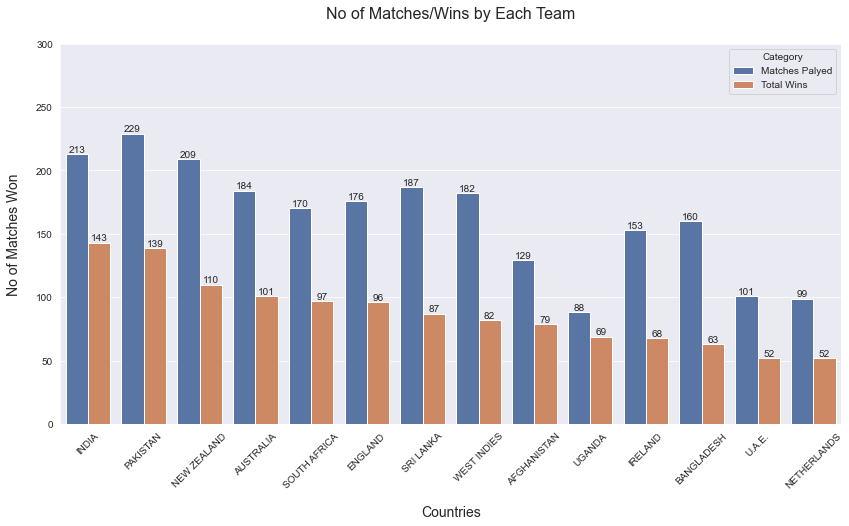

In [61]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (14,7))
sns.barplot(data= team_stats_pivot, y ='value', x= 'country', hue = 'type', palette = 'deep', order = custom_order)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_ylim(0,300)
ax.set_xlabel('Countries', fontsize= 14, labelpad= 15)
xtick_labels = [tick.get_text().upper() for tick in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('No of Matches Won', fontsize= 14, labelpad= 15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles, title = 'Category', labels = ['Matches Palyed', 'Total Wins'])
ax.set_title('No of Matches/Wins by Each Team', y = 1.05, fontsize= 16)
sns.despine(top=True, right = True);

In [62]:
team_stats['win_ratio']= (team_stats['no_of_wins']/team_stats['no_of_matches'] * 100).round(1)

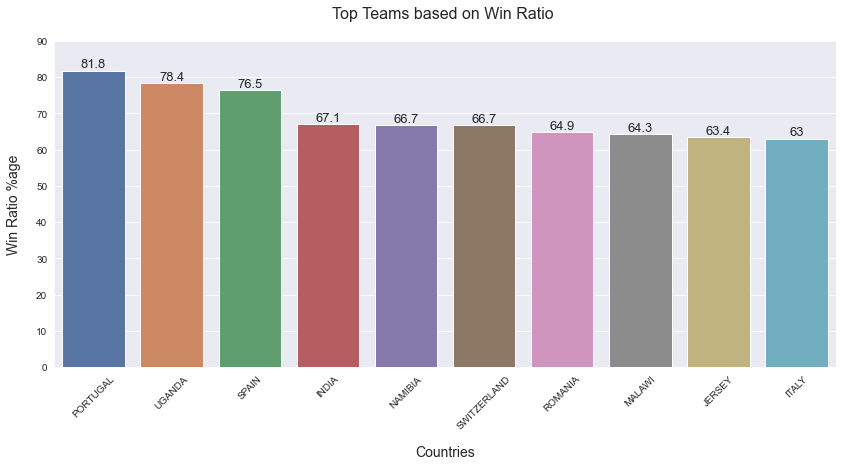

In [63]:
fig, ax = plt.subplots(figsize = (14, 6))
sns.barplot(data = team_stats.nlargest(10, 'win_ratio'), x= 'country', y = 'win_ratio', palette = 'deep')
ax.bar_label(ax.containers[0], fontsize = 13)
ax.set_title('Top Teams based on Win Ratio ', y = 1.05, fontsize= 16)
ax.set_ylabel('Win Ratio %age', fontsize= 14, labelpad= 15)
xtick_labels = [tick.get_text().upper() for tick in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 90)
ax.set_xlabel('Countries', fontsize= 14, labelpad= 15);

In [64]:
team_stats['performance_metric'] = (team_stats['no_of_matches'] * team_stats['win_ratio'] /100).round(1)

In [65]:
team_stats['team_category'] =  pd.cut(team_stats['performance_metric'], 
                                      bins =(0,50,150), right= False, labels = ['minnow', 'top tier'])

In [66]:
team_stats

,country,no_of_matches,no_of_wins,win_ratio,performance_metric,team_category
0,pakistan,229,139,60.7,139.0,top tier
1,india,213,143,67.1,142.9,top tier
2,new zealand,209,110,52.6,109.9,top tier
3,sri lanka,187,87,46.5,87.0,top tier
4,australia,184,101,54.9,101.0,top tier
...,...,...,...,...,...,...
100,brazil,4,1,25.0,1.0,minnow
101,iran,3,0,0.0,0.0,minnow
102,mongolia,3,0,0.0,0.0,minnow
103,world-xi,3,1,33.3,1.0,minnow


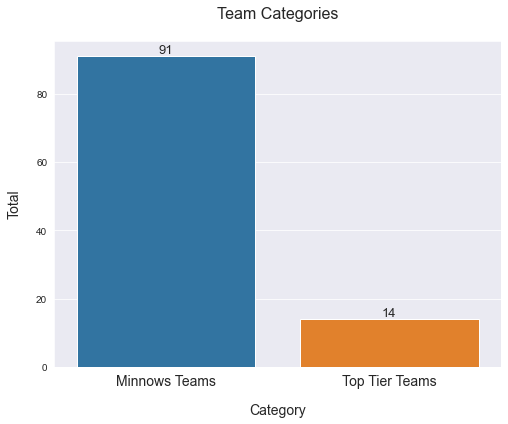

In [67]:
teams_categories = team_stats.team_category.value_counts().to_frame().reset_index() #making new dataframe for visualization
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = teams_categories, x= 'index', y = 'team_category')
ax.bar_label(ax.containers[0], fontsize = 13)
ax.set_title('Team Categories', y = 1.05, fontsize= 16)
ax.set_ylabel('Total', fontsize= 14, labelpad= 15)
ax.set_xticklabels(['Minnows Teams', 'Top Tier Teams'], fontsize = 14)
ax.set_xlabel('Category', fontsize= 14, labelpad= 15);

In [68]:
top_ranked_teams = team_stats[team_stats['team_category'] == 'top tier']['country'].to_list()

In [69]:
top_ranked_teams

['pakistan',
 'india',
 'new zealand',
 'sri lanka',
 'australia',
 'west indies',
 'england',
 'south africa',
 'bangladesh',
 'ireland',
 'afghanistan',
 'u.a.e.',
 'netherlands',
 'uganda']

## WIn Ratio

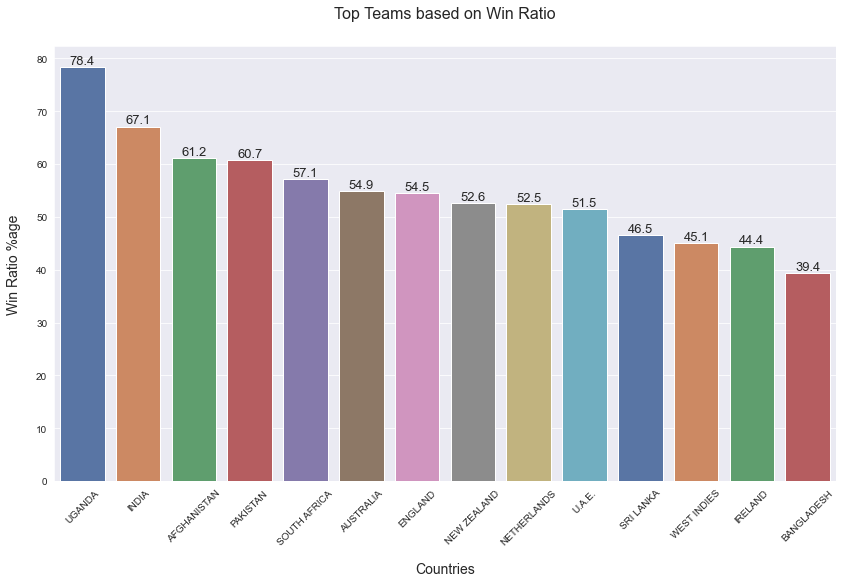

In [70]:
custom_order_wins = team_stats[team_stats.team_category == 'top tier'].sort_values(
    by = 'win_ratio', ascending= False)['country'].to_list() ##custom order for the bars of graph

fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(data = team_stats[team_stats.team_category == 'top tier'], x= 'country', order = custom_order_wins,
            y = 'win_ratio', palette='deep')
ax.bar_label(ax.containers[0], fontsize = 13)
ax.set_title('Top Teams based on Win Ratio', y = 1.05, fontsize= 16)
ax.set_ylabel('Win Ratio %age', fontsize= 14, labelpad= 15)
xtick_labels = [tick.get_text().upper() for tick in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Countries', fontsize= 14, labelpad= 15);

In [71]:
def toss_impact(row):
    if row['match_winner'] == row['toss_winner']:
        return 'won by team winning toss'
    elif row['match_winner'] == 'match tied':
        return 'match tied'
    else:
        return 'won by team losing toss'

In [72]:
df['toss_impact'] = df.apply(toss_impact, axis = 1) #making informative column on original dataframe

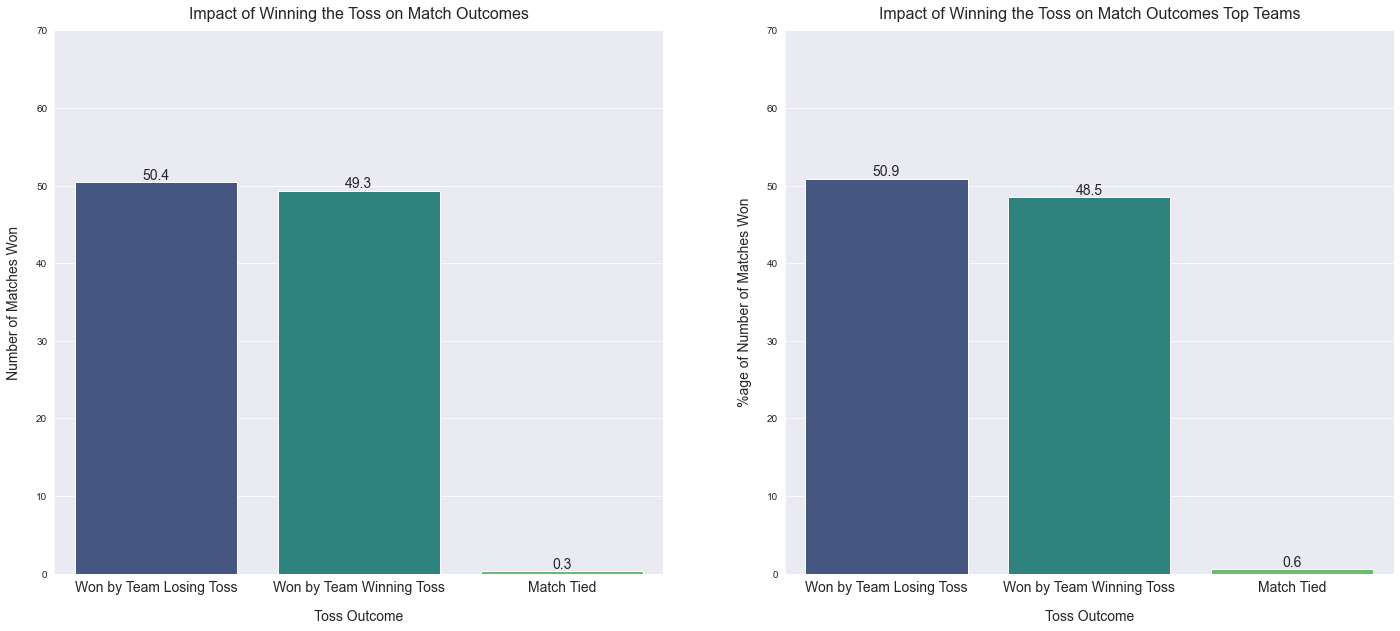

In [73]:
## 1st graph of figure
toss = (df['toss_impact'].value_counts(normalize = True)*100).round(1).to_frame().reset_index().rename(columns
                                    = {'index' : 'type', 'toss_impact': 'values' })## new df for 1st graph of fig.

fig, ax = plt.subplots(1,2, figsize = (24, 10))
sns.barplot(data= toss, y ='values', x= 'type', palette='viridis', ax= ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize = 14)
ax[0].set_title('Impact of Winning the Toss on Match Outcomes', y = 1.01, fontsize= 16)
ax[0].set_ylabel('Number of Matches Won', fontsize= 14, labelpad= 15)
ax[0].set_xticklabels(['Won by Team Losing Toss', 'Won by Team Winning Toss', 'Match Tied'], fontsize = 14)
ax[0].tick_params(axis='x', rotation=0)
ax[0].set_ylim(0, 70)
ax[0].set_xlabel('Toss Outcome', fontsize= 14, labelpad= 15)

## 2nd graph of figure

toss_tops = (df[(df['match_winner'].isin(top_ranked_teams)) | (df['match_winner'] == 'match tied')]['toss_impact'].value_counts(
normalize= True)*100).round(1).reset_index().rename(columns
 = {'index' : 'type', 'toss_impact': 'values' })## new df for 2nd graph of fig.
sns.barplot(data= toss_tops, y ='values', x= 'type', palette='viridis')
ax[1].bar_label(ax[1].containers[0], fontsize = 14)
ax[1].set_title('Impact of Winning the Toss on Match Outcomes Top Teams', y = 1.01, fontsize= 16)
ax[1].set_ylabel('%age of Number of Matches Won', fontsize= 14, labelpad= 15)
ax[1].set_xticklabels(['Won by Team Losing Toss', 'Won by Team Winning Toss', 'Match Tied'], fontsize = 14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].set_ylim(0,70)
ax[1].set_xlabel('Toss Outcome', fontsize= 14, labelpad= 15);

In [74]:
def winner_details(row):
    if row['match_winner'] == row['team1_name']:
        return 'won by team batting first'
    elif row['match_winner'] == row['team2_name']:
        return 'won by team batting second'
    else:
        return 'match tied'

In [75]:
df['winner_details'] = df.apply(winner_details, axis = 1) #making informative column on original dataframe

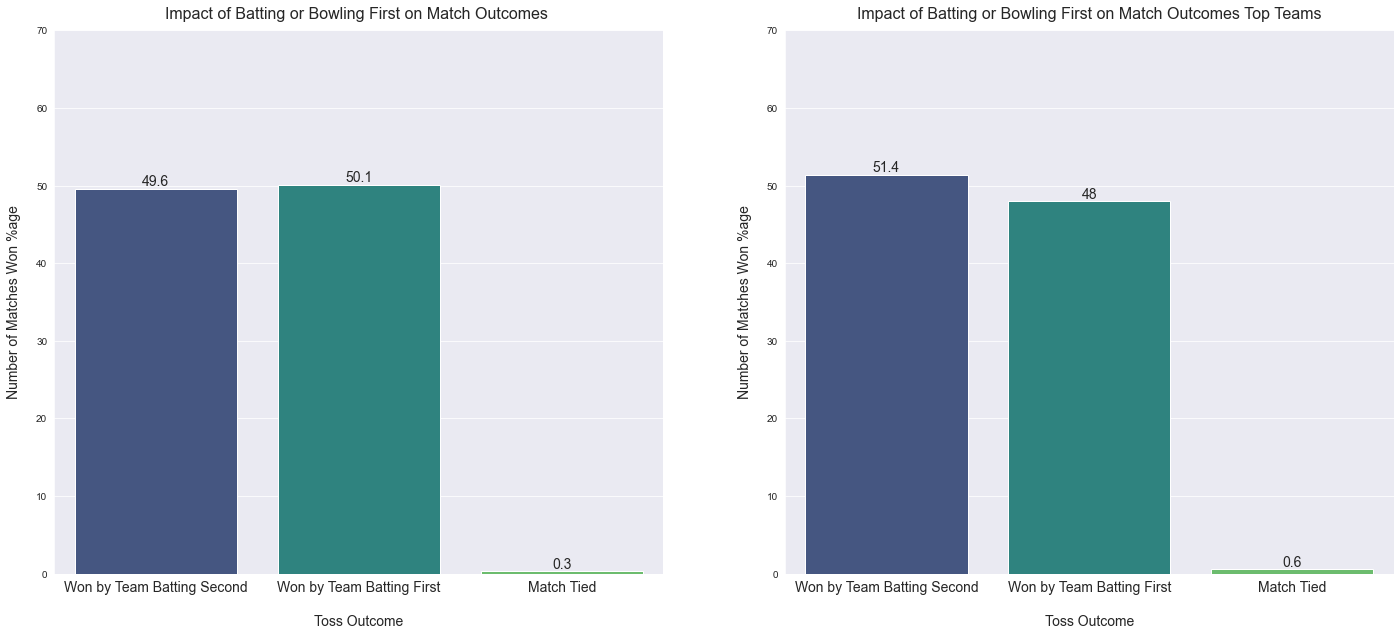

In [76]:
## 1st graph of figure
who_wins = (df['winner_details'].value_counts(normalize = True)*100).round(1).to_frame().reset_index().rename(columns
            = {'index' : 'type', 'winner_details': 'values' }) ## new df for 1st graph of fig.
fig, ax = plt.subplots(1,2, figsize = (24, 10))
sns.barplot(data= who_wins, y ='values', x= 'type', palette='viridis',
           order = ['won by team batting first', 'won by team batting second','match tied'], ax= ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize = 14)
ax[0].set_title('Impact of Batting or Bowling First on Match Outcomes ', y = 1.01, fontsize= 16)
ax[0].set_ylabel('Number of Matches Won %age', fontsize= 14, labelpad= 15)
ax[0].set_xticklabels(['Won by Team Batting Second', 'Won by Team Batting First', 'Match Tied'], fontsize = 14)
ax[0].tick_params(axis='x', rotation=0)
ax[0].set_ylim(0, 70)
ax[0].set_xlabel('Toss Outcome', fontsize= 14, labelpad= 20); 

## 2nd graph of figure
who_wins_tops = (df[(df['match_winner'].isin(top_ranked_teams)) | (df['match_winner'] == 
    'match tied')]['winner_details'].value_counts(
    normalize= True)*100).round(1).reset_index().rename(columns
     = {'index' : 'type', 'winner_details': 'values' })## new df for 2nd graph of fig.

sns.barplot(data= who_wins_tops, y ='values', x= 'type', palette='viridis',
           order = ['won by team batting first', 'won by team batting second','match tied'], ax= ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize = 14)
ax[1].set_title('Impact of Batting or Bowling First on Match Outcomes Top Teams', y = 1.01, fontsize= 16)
ax[1].set_ylabel('Number of Matches Won %age', fontsize= 14, labelpad= 15)
ax[1].set_xticklabels(['Won by Team Batting Second', 'Won by Team Batting First', 'Match Tied'], fontsize = 14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].set_ylim(0, 70)
ax[1].set_xlabel('Toss Outcome', fontsize= 14, labelpad= 20); 

In [77]:
top_venues = df[(df['team1_name'].isin(top_ranked_teams)) | (df['team2_name'].isin(top_ranked_teams))]['venue_country'].value_counts(
    ascending = False).nlargest(13)
top_venues

united arab emirates    198
india                   124
south africa            109
bangladesh              108
australia                99
west indies              97
new zealand              93
england                  86
sri lanka                81
zimbabwe                 54
ireland                  50
oman                     42
pakistan                 40
Name: venue_country, dtype: int64

In [78]:
top_venues_list = top_venues.index.to_list()
top_venues_list

['united arab emirates',
 'india',
 'south africa',
 'bangladesh',
 'australia',
 'west indies',
 'new zealand',
 'england',
 'sri lanka',
 'zimbabwe',
 'ireland',
 'oman',
 'pakistan']

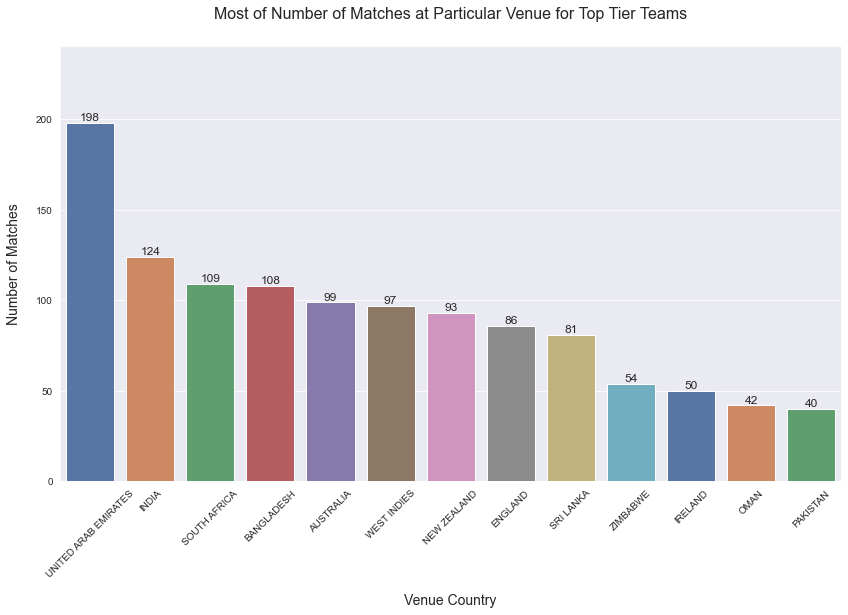

In [79]:
fig, ax = plt.subplots(1,1, figsize = (14, 8))
sns.barplot(data= top_venues.to_frame().reset_index().rename(columns = {'index' : 'venue', 'venue_country' :'no_of_mmatches'})
            , y ='no_of_mmatches', x= 'venue', palette='deep')
ax.bar_label(ax.containers[0], fontsize = 12)
ax.set_title('Most of Number of Matches at Particular Venue for Top Tier Teams', y = 1.05, fontsize= 16)
ax.set_ylabel('Number of Matches', fontsize= 14, labelpad= 15)
xtick_labels = [tick.get_text().upper() for tick in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 240)
ax.set_xlabel('Venue Country', fontsize= 14, labelpad= 15); 

In [80]:
#lets replace other venues by 'others' value

In [81]:
df['venue_country'] = df.apply(lambda row: row['venue_country'] if row['venue_country'] in
                               top_venues_list else 'others', axis =1 )

In [82]:
df.drop(columns = ['venue_stadium','venue_city', 'match_name'], inplace = True)

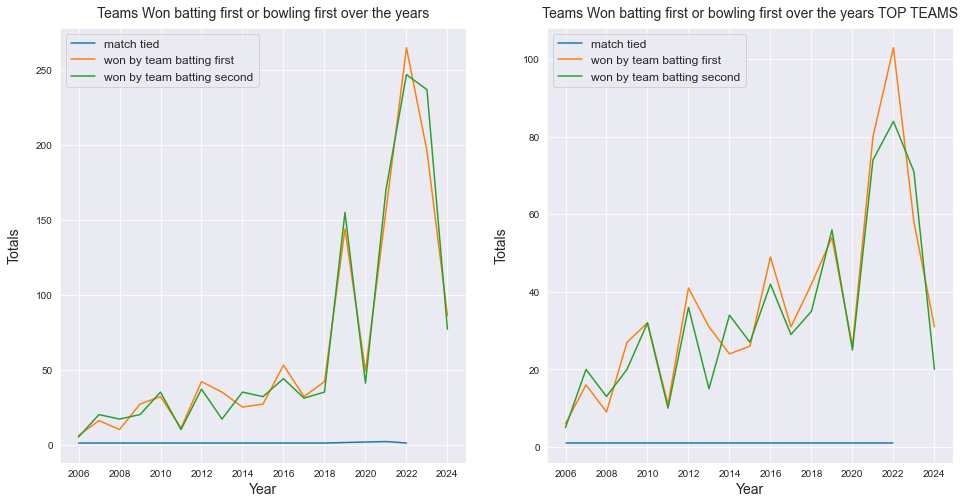

In [83]:
yearly_analysis =df.groupby([df['match_date'].dt.year, 'winner_details'])['match_no'].count().reset_index().rename(
    columns= {'match_date':'year', 'winner_details': 'type', 'match_no':'totals'})

fig, ax = plt.subplots(1,2, figsize = (16, 8))
sns.lineplot(data = yearly_analysis, x= 'year', y = 'totals', ci = None, hue = 'type', ax = ax[0])
ax[0].set_title('Teams Won batting first or bowling first over the years', y = 1.01, fontsize= 14)
ax[0].set_ylabel('Totals', fontsize= 14, labelpad= 15)
ax[0].set_xlabel('Year', fontsize = 14)
years_ticks = list(range(2006, 2026, 2))
ax[0].legend(fontsize = 12)
ax[0].set_xticks(years_ticks)


yearly_analysis_top_teams = df[(df['team1_name'].isin(top_ranked_teams)) | (df['team2_name'].isin(top_ranked_teams))].groupby(
    [df['match_date'].dt.year, 'winner_details'])['match_no'].count().reset_index().rename(
    columns= {'match_date':'year', 'winner_details': 'type', 'match_no':'totals'})
sns.lineplot(data = yearly_analysis_top_teams, x= 'year', y = 'totals', ci = None, hue = 'type', ax = ax[1])
ax[1].set_title('Teams Won batting first or bowling first over the years TOP TEAMS', y = 1.01, fontsize= 14)
ax[1].set_ylabel('Totals', fontsize= 14, labelpad= 15)
ax[1].set_xticks(years_ticks)
ax[1].legend(fontsize = 12)
ax[1].set_xlabel('Year', fontsize = 14);

# win ratios change with batting first or second

In [84]:
query = ((df['team1_name'].isin(top_ranked_teams)) | (df['team2_name'].isin(
    top_ranked_teams))) & (df['match_winner'].isin(top_ranked_teams))

top_teams_win_ratios = df[query].groupby(['match_winner', 'winner_details']).size().reset_index()
top_teams_win_ratios = top_teams_win_ratios.pivot(index= 'match_winner', columns = ['winner_details'], values = 0).reset_index()

top_teams_win_ratios['total'] = top_teams_win_ratios['won by team batting first'] + top_teams_win_ratios['won by team batting second']



In [85]:
top_teams_win_ratios.columns = ['team', 'bat_first_stat', 'bat_second_stat', 'total']
top_teams_win_ratios['bat_first_stat'] = (
    top_teams_win_ratios['bat_first_stat']/top_teams_win_ratios['total'] *100).round(1)

top_teams_win_ratios['bat_second_stat'] = (
    top_teams_win_ratios['bat_second_stat']/top_teams_win_ratios['total'] *100).round(1)
top_teams_win_ratios.drop(columns = 'total', inplace = True)

In [86]:
top_teams_win_ratios = top_teams_win_ratios.melt(id_vars = 'team', 
                        value_vars = ['bat_first_stat', 'bat_second_stat'],var_name = 'type')

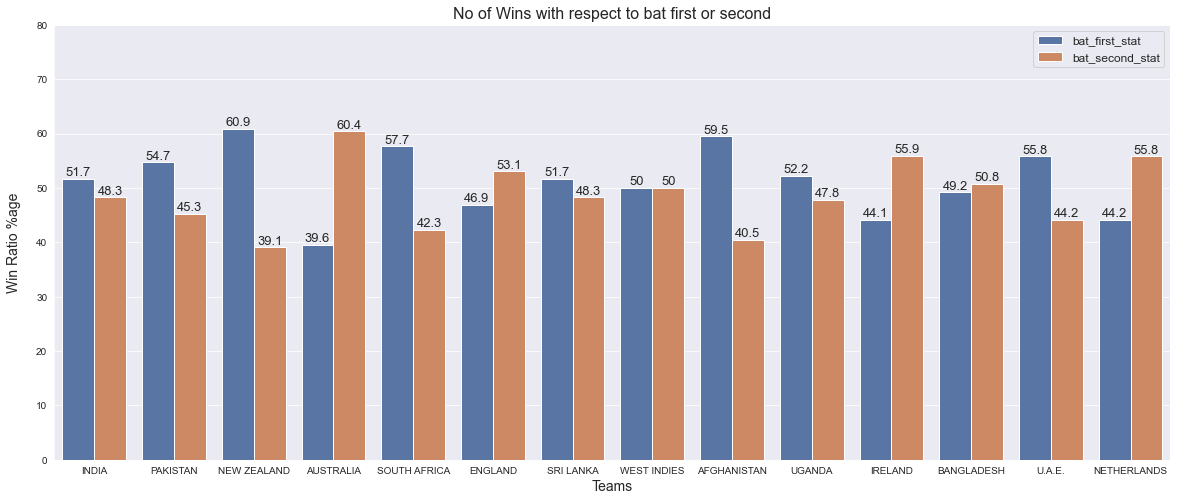

In [87]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data= top_teams_win_ratios, y ='value', x= 'team', hue = 'type', palette = 'deep', order = custom_order)
ax.bar_label(ax.containers[0], fontsize = 13)
ax.bar_label(ax.containers[1], fontsize=13)
ax.set_xlabel('Teams', fontsize = 14)
ax.set_ylabel('Win Percentage', fontsize = 14)
ax.set_title('No of Wins with respect to bat first or second', fontsize = 16)
ax.set_ylabel('Win Ratio %age', fontsize= 14, labelpad= 15)
xtick_labels = [tick.get_text().upper() for tick in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)
ax.legend(fontsize = 12)
ax.set_ylim(0, 80);

# Analysis top tier teams

In [88]:
def repl_team_2(row):
    if row['team1_name'] in top_ranked_teams and row['team2_name'] not in top_ranked_teams:
        return 'minnow'
    else:
        return row['team2_name']
    
def repl_team_1(row):
    if row['team2_name'] in top_ranked_teams and row['team1_name'] not in top_ranked_teams:
        return 'minnow'
    else:
        return row['team1_name']

def repl_match_winner(row):
    if row['match_winner'] not in top_ranked_teams:
        return 'minnow'
    else:
        return row['match_winner']

In [89]:
model_df = df.copy()

In [90]:
## Dropping all Minnow Teams whenever they play against each other. This is done as their frequency in target variable
## is less than 5 times.

In [91]:
model_df = model_df[(model_df['team1_name'].isin(top_ranked_teams)) | (model_df['team2_name'].isin(top_ranked_teams))]

In [92]:
model_df['team1_name'] = model_df.apply(repl_team_1, axis =1)
model_df['team2_name'] = model_df.apply(repl_team_2, axis =1)
model_df['match_winner'] = model_df.apply(repl_match_winner, axis =1)

In [93]:
## Dropping un-necessary Features. 

In [94]:
model_df.drop(columns = ['match_no', 'match_date', 'team1_runs_scored', 'team2_runs_scored', 'team1_wickets_fell', 
                         'team2_wickets_fell','toss_winner_choice', 'toss_winner_choice', 'winner_details', 
                        'match_result_text', 'toss_impact', 'toss_winner'], inplace= True)

In [95]:
model_df

,team1_name,team2_name,venue_country,match_winner
0,australia,new zealand,new zealand,australia
1,england,australia,england,england
2,south africa,new zealand,south africa,new zealand
3,australia,south africa,australia,australia
4,west indies,new zealand,new zealand,minnow
...,...,...,...,...
2515,new zealand,pakistan,pakistan,new zealand
2516,pakistan,new zealand,pakistan,pakistan
2519,minnow,bangladesh,bangladesh,bangladesh
2522,minnow,bangladesh,bangladesh,bangladesh


In [96]:
# who plays against who most often. Let's see. 

In [97]:
model_df['matchup'] = model_df.apply(lambda row: ', '.join(sorted([row['team1_name'], row['team2_name']])), axis=1)

In [98]:
who_plays_who = model_df['matchup'].value_counts(ascending = False).to_frame().reset_index().rename(columns = 
                                                    {'index': 'match_between', 'matchup': 'no_of_matches'})

In [99]:
who_plays_who[['teama','teamb']] =who_plays_who['match_between'].str.split(',', expand = True)

In [100]:
who_plays_who.drop(columns = 'match_between', inplace = True)

In [101]:
who_plays_who = who_plays_who.pivot_table(index='teama', columns='teamb', values='no_of_matches', fill_value=0).T

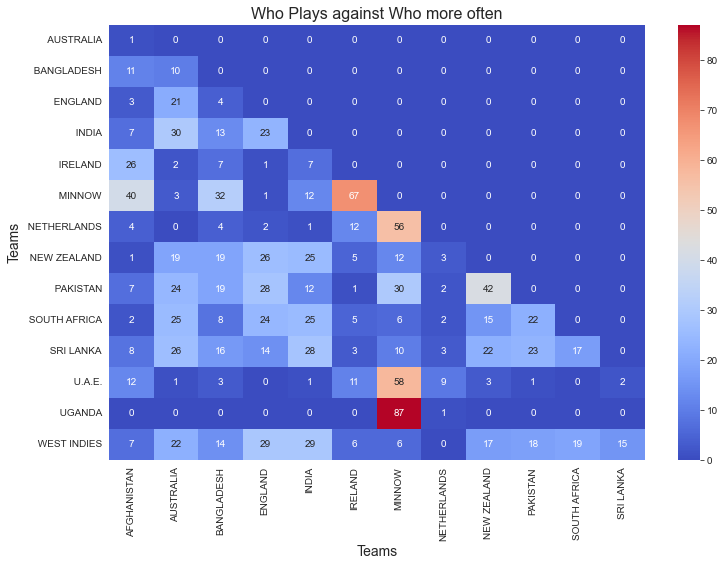

In [102]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(who_plays_who, annot=True, cmap='coolwarm', fmt='d', cbar= True)
ax.set_xlabel('Teams', fontsize = 14)
ax.set_ylabel('Teams', fontsize = 14)
ax.set_title('Who Plays against Who more often', fontsize = 16)
xtick_labels = [tick.get_text().upper() for tick in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)
ytick_labels = [tick.get_text().upper() for tick in ax.get_yticklabels()]
ax.set_yticklabels(ytick_labels);

In [103]:
model_df = model_df.drop(columns = 'matchup')

In [104]:
## Incorporating Win-Ratio for both teams in the dataframe as we extracted above. 

In [105]:
team_stats.head(5)

,country,no_of_matches,no_of_wins,win_ratio,performance_metric,team_category
0,pakistan,229,139,60.7,139.0,top tier
1,india,213,143,67.1,142.9,top tier
2,new zealand,209,110,52.6,109.9,top tier
3,sri lanka,187,87,46.5,87.0,top tier
4,australia,184,101,54.9,101.0,top tier


In [106]:
model_df = model_df.merge(team_stats, left_on = 'team1_name', right_on = 'country', how = 'left').iloc[:, [0,1,2,3,8]]

In [107]:
model_df = model_df.rename(columns = {'performance_metric' : 'team1_metric'})

In [108]:
model_df = model_df.merge(team_stats, how = 'left', left_on = 'team2_name', right_on = 'country').iloc[:, [0,1,2,3,4,9]]

In [109]:
model_df = model_df.rename(columns = {'performance_metric' : 'team2_metric'})

In [110]:
##There are NAN values as we have removed Minnow teams. So we are replacing theri Win Ratio with 0.

In [111]:
model_df.fillna(0, inplace = True)

# MACHINE LEARNING MODEL



In [112]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score

In [113]:
# Splittiing the data set

In [114]:
X_train,X_test,y_train,y_test = train_test_split(model_df.drop(columns=['match_winner']),
                                                 model_df['match_winner'],
                                                 test_size=0.2,
                                                random_state=42)

In [115]:
label_encoder = LabelEncoder()

In [116]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Making Machine Learning PipeLine

In [118]:
X_train.tail(5)

,team1_name,team2_name,venue_country,team1_metric,team2_metric
1095,australia,india,india,101.0,142.9
1130,afghanistan,england,australia,78.9,95.9
1294,england,west indies,west indies,95.9,82.1
860,pakistan,minnow,zimbabwe,139.0,0.0
1126,sri lanka,netherlands,australia,87.0,52.0


In [119]:
#Tranformer. We will Standardize the column and encode the columns.

trf1 = ColumnTransformer(transformers = [('scale',MinMaxScaler(), [3,4]),
            ('ohe_teams_venue', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), [0,1,2])],
                         remainder='passthrough')

In [120]:
# We will use follwing Classfiers one by one and then check each scores for Each Classifier.
## for simplicicty and to save time default parameters of follwing classifers shall be used.

classifiers = [('Decision Tree', DecisionTreeClassifier()),
               ('Multinomial NB', MultinomialNB()),
               ('Gaussian NB', GaussianNB()),
               ('Random Forest', RandomForestClassifier()),
               ('SVC', SVC()),
               ('MLPC', MLPClassifier(max_iter=1000)), 
               ('KNN', KNeighborsClassifier())]

In [121]:
# Let's check Scores for each classifier through Cross Validation and making the pipeline. 

for name, clf in classifiers:
    pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',clf)])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean accuracy = {scores.mean():.3f}, Max Score = {scores.max():.3f}\n")

Decision Tree: Mean accuracy = 0.581, Max Score = 0.606

Multinomial NB: Mean accuracy = 0.585, Max Score = 0.644

Gaussian NB: Mean accuracy = 0.213, Max Score = 0.236

Random Forest: Mean accuracy = 0.604, Max Score = 0.648

SVC: Mean accuracy = 0.619, Max Score = 0.657

MLPC: Mean accuracy = 0.581, Max Score = 0.620

KNN: Mean accuracy = 0.571, Max Score = 0.611



In [122]:
## Selecting Random Forest for our Model. Let's perform Grid Search CV

In [123]:
trf2 = RandomForestClassifier()

In [124]:
pipe_line = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)])

In [125]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [126]:
pipe_line.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  [3, 4]),
                                                 ('ohe_teams_venue',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2])])),
                ('trf2', RandomForestClassifier())])

In [127]:
## Performing Grid Search CV for our Model.

In [128]:
param_grid = {'trf3__n_estimators': [100, 200, 300, 400],
              'trf3__max_depth' :[10, 20, 30, 40, 50, None],
             'trf3__max_features': ['auto', 'sqrt', 'log2'],
             'trf3__bootstrap': [True, False]}

In [129]:
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(pipe_line,param_grid , cv=3, scoring='accuracy')
# grid.fit(X_train, y_train)

In [130]:
# grid.best_score_

In [131]:
# grid.best_params_

In [132]:
## Lets Test Sample. Let's say there is match between Pakistan and India in Pakistan. For now we have to remember metrics.
## :')' so We will add those ourselves.

In [133]:
input_data = pd.DataFrame({'team1_name' : 'india', 'team2_name' : 'pakistan', 'venue_country' : 'others',
                          'team1_metric' : [142.9], 'team2_metric' : [139]})

In [134]:
encoded_output = pipe_line.predict(input_data)

In [135]:
encoded_output

array([9])

In [136]:
pipe_line.predict_proba(input_data)[0,4]

0.3480396825396826

In [137]:
## Let's decode our output.

In [138]:
Winner_prediction = label_encoder.inverse_transform(encoded_output)
print(Winner_prediction)

['pakistan']
